### Import necessary modules

In [16]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from collections import Counter
plt.rcParams['figure.figsize'] = [15, 10]

### Read all the data, ignoring first column as index and with no header

In [17]:
xtrain = pd.read_csv('trainData.csv', header=None, index_col=0)
ytrain = pd.read_csv('trainLabels.csv', header=None, index_col=0)
xval = pd.read_csv('valData.csv', header=None, index_col=0)
yval = pd.read_csv('valLabels.csv', header=None, index_col=0)
xtest = pd.read_csv('testData.csv', header=None, index_col=0)

feats = list(pd.read_csv('featureTypes.txt', header=None)[0])

xtrain = np.array(xtrain) 
ytrain = np.array(ytrain)
xval = np.array(xval)
yval = np.array(yval)
xtest = np.array(xtest)
print "xtrain : " , xtrain.shape
print "ytrain : " , ytrain.shape
print "xval : " , xval.shape
print "yval : " , yval.shape
print "xtest : " , xtest.shape

xtrain :  (5000, 3000)
ytrain :  (5000, 1)
xval :  (5000, 3000)
yval :  (5000, 1)
xtest :  (5000, 3000)


### Ridge Regression function
 - Contructs the required matrices X_bar, I_bar, C, d
 - Computes w_bar, C_inverse 
 - For each training data, computes CV_error as per question 2.5
 - Separates last row of w_bar as b and remaining of w_bar as w
 - computes the objective function
 - returns w, b, objective, cv_errors

In [18]:
def ridgeReg(X, y, lam):
    k, n = X.shape
    X_bar = np.vstack((X, np.ones(shape=(1,n))))
    I = np.identity(k)
    I_bar_1 = np.vstack((I, np.zeros(shape=(1,k))))
    I_bar = np.hstack((I_bar_1, np.zeros(shape=(k+1,1))))
    C = np.dot(X_bar, X_bar.T) + lam * I_bar
    d = np.dot(X_bar,y)
    C_inv = np.linalg.inv(C)
    w_bar = np.dot(C_inv, d)
    cv_errors = []
    print lam
    for i in range(n):
        y_i = y[i,0]
        X_bar_i = X_bar[:,i]
        X_bar_i.shape = (np.size(X_bar_i),1)
                
        C_term = np.dot(C_inv, X_bar_i)
        numerator = -y_i + np.dot(w_bar.T, X_bar_i)
        denominator = 1 - np.dot(X_bar_i.T, C_term)
        
        cv_error_i = numerator[0][0]/denominator[0][0]
        cv_errors.append(cv_error_i)
        
    w = w_bar[:k,:]
    b = w_bar[k]
    obj = lam * np.dot(w.T, w)[0][0] + np.sum(np.power(np.dot(X.T, w)+b-y,2))
    return (w, b, obj, cv_errors) 

### Function to compute RMSE for CV_errors

In [25]:
def RMSE(x):
    return np.sqrt(np.dot(x.T,x)/x.size)

### Running ridgeReg function for each lambda only on the Train data and recording objective value, RMSE values for LOOCV, train, val data into different dictionaries

In [26]:
lambdas = [0.01, 0.1, 1, 10, 100, 1000]
rms_train_dict = {}
rms_val_dict = {}
rms_loocv_dict = {}
obj_loocv_dict = {}
for lam in lambdas :
    w, b, obj, cv_errors = ridgeReg(xtrain.T, ytrain, lam)
    cv_err = RMSE(np.array(cv_errors))
    rms_loocv_dict[lam] = cv_err
    obj_loocv_dict[lam] = obj
    
    # predict for train data and calculate RMSE of predicted vs actual labels
    ytrain_pred = np.dot(xtrain, w) + b
    rms_train = sqrt(mean_squared_error(ytrain, ytrain_pred))
    rms_train_dict[lam]=rms_train
    
    # predict for val data and calculate RMSE of predicted vs actual labels
    yval_pred = np.dot(xval, w)+b
    rms_val = sqrt(mean_squared_error(yval, yval_pred))
    rms_val_dict[lam]=rms_val

0.01
0.1
1
10
100
1000


### Question - 3.2.1 - Plotting Lambda vs RMSE for train, validation, LOOCV

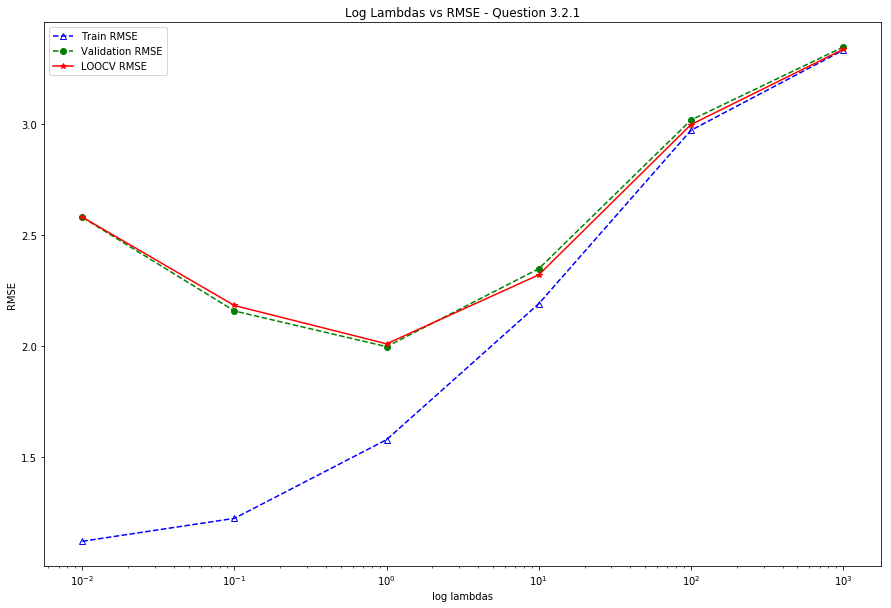

In [27]:
rms_train_1 = sorted(rms_train_dict.items())
x, y1 = zip(*rms_train_1)

rms_val_2 = sorted(rms_val_dict.items())
x, y2 = zip(*rms_val_2)

rms_loocv_3 = sorted(rms_loocv_dict.items())
x, y3 = zip(*rms_loocv_3)

fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)

ax.semilogx(x, y1,c='b',marker="^",ls='--',label='Train RMSE',fillstyle='none')
ax.semilogx(x, y2,c='g',marker="o",ls='--',label='Validation RMSE')
ax.semilogx(x, y3,c='r',marker="*", ls='-',label='LOOCV RMSE')
ax.set_xlabel("log lambdas")
ax.set_ylabel("RMSE")
ax.set_title("Log Lambdas vs RMSE - Question 3.2.1")
plt.legend(loc=2)
plt.savefig("RMSE_train_val_loocv.png")
plt.draw()

## As seen from the plot, we get minimum value for LOOCV error (red line) for lambda = 1.

### Question 3.2.2 - objective function, regterm and SSE for this lambda value.

In [28]:
lam_optimal = 1.0
w_optimal, b_optimal, obj_optimal, cv_errors_optimal = ridgeReg(xtrain.T, ytrain, lam_optimal)

reg_term = lam_optimal * np.dot(w_optimal.T, w_optimal)[0][0]
sse_term = np.sum(np.power(np.dot(xtrain, w_optimal)+b_optimal-ytrain,2))
obj = reg_term + sse_term
print "Objective Function : \t" ,obj_optimal
print "Regularisation Term : \t", reg_term
print "SSE Term : \t", sse_term

1.0
Objective Function : 	17200.94056872298
Regularisation Term : 	4749.951293698884
SSE Term : 	12450.989275024098


### Question 3.2.3 - top 10 most important features and the top 10 least important features

In [29]:
max10_indices = sorted(range(len(w_optimal)), key=lambda i: w_optimal[i], reverse=True)[:10]
min10_indices = sorted(range(len(w_optimal)), key=lambda i: w_optimal[i])[:10]

max10_values = [w_optimal[i][0] for i in max10_indices]
min10_values = [w_optimal[i][0] for i in min10_indices]

print "IMPORTANT FEATURES : "
print "index \t weight_value \t\t feature_name"
for i in range(10):
    print max10_indices[i],"\t", max10_values[i], "\t", feats[max10_indices[i]]
    
print ""
    
print "LEAST IMPORTANT FEATURES : "
print "index \t weight_value \t\t feature_name"
for i in range(10):
    print min10_indices[i],"\t", min10_values[i],"\t", feats[min10_indices[i]]

IMPORTANT FEATURES : 
index 	 weight_value 		 feature_name
184 	6.9989533782008095 	infused
754 	5.663260515336987 	pineapple orange
773 	5.6365234545882 	red
1272 	5.19472756487292 	sweet black
642 	5.1285050944947415 	little heavy
186 	5.07889124048474 	new french
1924 	4.848258144672059 	future
2835 	4.786819319039523 	currant cola
2068 	4.7359530904115275 	cocktail
781 	4.690847637303591 	price dry

LEAST IMPORTANT FEATURES : 
index 	 weight_value 		 feature_name
2368 	-5.280346413182997 	flavors nice
1486 	-4.64360364581762 	soft
2821 	-4.464187838964335 	low alcohol
2563 	-4.229779620338604 	cuts
2779 	-3.9100117666080223 	yeast
1341 	-3.7421448352477 	spices
878 	-3.522204347505294 	relatively
2093 	-3.4953469847191627 	love
2267 	-3.2789943649822817 	appealing
1352 	-3.1678059264148715 	cherries plums


### Question 3.2.4 - 
 1. Since we got LOOCV error least around lambda=1.0,  Let's try for some more values of lambda around 1.0
 2. Also, to avoid overfitting, let us train our model on training+validation data . So that our model sees more data.

In [33]:
lambdas = [0.5, 0.6, 0.65, 0.7, 0.75, 0.77, 0.78, 0.9, 1.0]
rms_train_dict2 = {}
rms_val_dict2 = {}
rms_loocv_dict2 = {}
obj_loocv_dict2 = {}
for lam in lambdas :
    w, b, obj, cv_errors = ridgeReg(np.vstack((xtrain,xval)).T, np.vstack((ytrain,yval)), lam)
    cv_err = RMSE(np.array(cv_errors))
    rms_loocv_dict2[lam] = cv_err
    obj_loocv_dict2[lam] = obj
    
    # predict for train data and calculate RMSE of predicted vs actual labels
    ytrain_pred = np.dot(xtrain, w) + b
    rms_train = sqrt(mean_squared_error(ytrain, ytrain_pred))
    rms_train_dict2[lam]=rms_train
    
    # predict for val data and calculate RMSE of predicted vs actual labels
    yval_pred = np.dot(xval, w)+b
    rms_val = sqrt(mean_squared_error(yval, yval_pred))
    rms_val_dict2[lam]=rms_val

0.5
0.6
0.65
0.7
0.75
0.77
0.78
0.9
1.0


In [34]:
rms_train_1 = sorted(rms_train_dict2.items())
x, y1 = zip(*rms_train_1)

rms_val_2 = sorted(rms_val_dict2.items())
x, y2 = zip(*rms_val_2)

rms_loocv_3 = sorted(rms_loocv_dict2.items())
x, y3 = zip(*rms_loocv_3)
'''
fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)

ax.plot(x, y1,c='b',marker="^",ls='--',label='Train RMSE',fillstyle='none')
ax.plot(x, y2,c='g',marker="o",ls='--',label='Validation RMSE')
ax.plot(x, y3,c='r',marker="*", ls='-',label='LOOCV RMSE')
ax.set_xlabel("lambdas")
ax.set_ylabel("RMSE")
ax.set_title("Lambdas vs RMSE - [trained on training+validation]")
plt.legend(loc=2)
plt.savefig("RMSE_train_val_loocv.png")
plt.draw()
'''
print "lambda \t objective \t\t train_rmse \t val_rmse \t loocv_error"
for i in range(len(x)):
    print x[i], "\t", obj_loocv_dict2[x[i]], "\t", y1[i], "\t",y2[i],"\t" ,y3[i]

lambda 	 objective 		 train_rmse 	 val_rmse 	 loocv_error
0.5 	28500.95629621417 	1.54937870695 	1.52478564917 	1.901641943043479
0.6 	29429.599802898825 	1.56463344839 	1.54094673837 	1.89775365346634
0.65 	29863.14789405083 	1.57189467132 	1.54867919332 	1.8966372759260324
0.7 	30278.950812814765 	1.57893028552 	1.55619301975 	1.895946288060275
0.75 	30678.6866650867 	1.58575332094 	1.56349862049 	1.8956103725147644
0.77 	30834.410859580767 	1.58842578184 	1.5663648598 	1.8955623906191772
0.78 	30911.42188872001 	1.58975022952 	1.56778630179 	1.895555291606752
0.9 	31794.903827914826 	1.60506529943 	1.58426648387 	1.8962190009038395
1.0 	32480.43418580203 	1.61708022125 	1.59724704963 	1.8976061272329332


### Since the model is trained on training+validation data, it has lower error on those sets.
### Lambda = 0.65 gives minimum LOOCV error. If we increase the lambda further, it deteriorates the objective.

### Let us predict for test set using Lambda = 0.65

In [36]:
lam_best = 0.65
w_best, b_best, obj_best, cv_errors_best = ridgeReg(np.vstack((xtrain, xval)).T, 
                                                    np.vstack((ytrain,yval)), lam_best)

reg_term = lam_best * np.dot(w_best.T, w_best)[0][0]
sse_term = np.sum(np.power(np.dot(np.vstack((xtrain, xval)), w_best)+
                           b_best-np.vstack((ytrain,yval)),2))
obj = reg_term + sse_term
print "Objective Function : \t" ,obj_best
print "Regularisation Term : \t", reg_term
print "SSE Term : \t", sse_term


ytest_pred = np.dot(xtest, w) + b

predictions_df = pd.DataFrame(ytest_pred)

predictions_df.index.rename('Id', inplace=True)
predictions_df.to_csv('predTestLabels.csv', index=True, header=['Prediction'])

0.65
Objective Function : 	29863.14789405083
Regularisation Term : 	5516.847386347286
SSE Term : 	24346.300507703545


## This Submission on Kaggle achieves RMSE value = 1.89551





## +++++++++++++++++  Other Failed Attempts ++++++++++++++++++++++++
### *NON-Evaluative*



### Approach 1 - Training only on train data with lambdas near 1.0

In [57]:
lambdas = [0.001, 0.01, 0.1, 0.5, 0.6, 0.7, 0.75, 0.77, 0.78, 0.9, 1.0,10]
rms_train_dict3 = {}
rms_val_dict3 = {}
rms_loocv_dict3 = {}
obj_loocv_dict3 = {}
for lam in lambdas :
    w, b, obj, cv_errors = ridgeReg(xtrain.T, ytrain, lam)
    cv_err = RMSE(np.array(cv_errors))
    rms_loocv_dict3[lam] = cv_err
    obj_loocv_dict3[lam] = obj
    
    # predict for train data and calculate RMSE of predicted vs actual labels
    ytrain_pred = np.dot(xtrain, w) + b
    rms_train = sqrt(mean_squared_error(ytrain, ytrain_pred))
    rms_train_dict3[lam]=rms_train
    
    # predict for val data and calculate RMSE of predicted vs actual labels
    yval_pred = np.dot(xval, w)+b
    rms_val = sqrt(mean_squared_error(yval, yval_pred))
    rms_val_dict3[lam]=rms_val
    
rms_train_1 = sorted(rms_train_dict3.items())
x, y1 = zip(*rms_train_1)

rms_val_2 = sorted(rms_val_dict3.items())
x, y2 = zip(*rms_val_2)

rms_loocv_3 = sorted(rms_loocv_dict3.items())
x, y3 = zip(*rms_loocv_3)

print "lambda \t objective \t\t train_rmse \t val_rmse \t loocv_error"
for i in range(len(x)):
    print x[i], "\t", obj_loocv_dict3[x[i]], "\t", y1[i], "\t",y2[i],"\t" ,y3[i]

0.001
0.01
0.1
0.5
0.6
0.7
0.75
0.77
0.78
0.9
1.0
10
lambda 	 objective 		 train_rmse 	 val_rmse 	 loocv_error
0.001 	6249.175598316274 	1.11113657739 	2.76489507732 	2.758463423090147
0.01 	6812.085392385374 	1.12051882476 	2.57918682571 	2.5801035217866795
0.1 	9546.668231966192 	1.2238119657 	2.15748126865 	2.182106499120722
0.5 	14228.750644571965 	1.44138967811 	1.9897361708 	2.0119968483037636
0.6 	14949.9437871984 	1.47502542797 	1.98674354727 	2.007009211658087
0.7 	15592.889781083193 	1.50478160642 	1.98692825341 	2.005206470466628
0.75 	15890.686877951453 	1.51847948226 	1.98781216543 	2.0051146725849054
0.77 	16005.935599834334 	1.5237653197 	1.98827919208 	2.005195908170012
0.78 	16062.777617436746 	1.52636913885 	1.98853430586 	2.0052591678464817
0.9 	16708.091329623974 	1.55577555061 	1.99251033382 	2.0069922059651546
1.0 	17200.94056872298 	1.57803607532 	1.99677151137 	2.0094740608893447
10 	32089.179083849813 	2.18995339575 	2.34770551392 	2.320135165798046


### Inference - Approach 1 has LOOCV no better than previously reported. 
    - Infact, since the model is seeing less data here, it maybe overfitting on train data resulting into smaller RMSE_train errors and not able to generalize well for validation dataset.
   

### Looking at Features that are zero for 5000 training examples

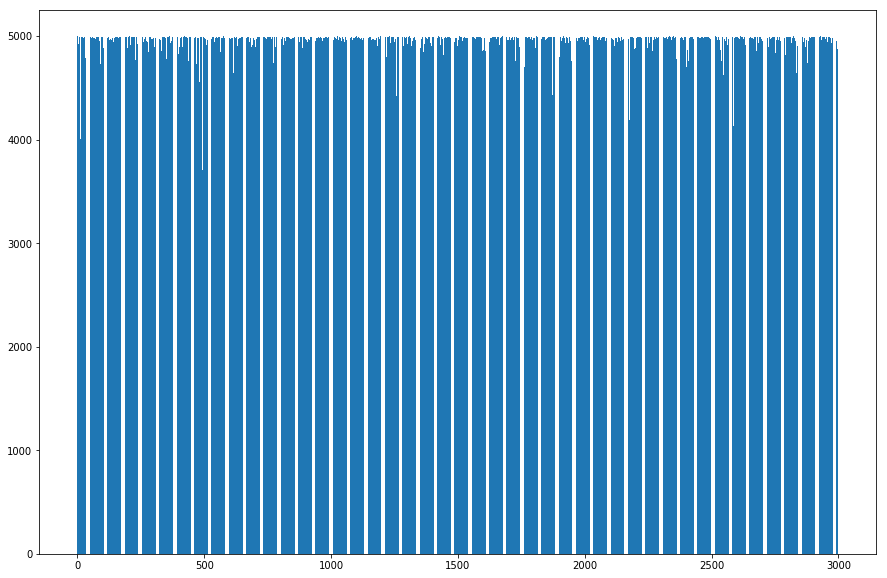

In [67]:
count_zeros_dict = {}
for i in range(xtrain.shape[1]):
    try:
        count_zeros_dict[i] = Counter(xtrain[:,i])[0.0]
    except:
        print i

count_zeros = sorted(count_zeros_dict.items())
x, y = zip(*count_zeros)
plt.bar(x,y)
plt.show()

Meaning - Most of the features are zero for most of the training examples. sparse data.
